In [1]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers.image_utils import load_image

/home/anton/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torch
torch.cuda.empty_cache()

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct",
    torch_dtype=torch.float16,
    _attn_implementation="eager", 
).to(DEVICE)

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image? Do you see the robot arm gripper and where? Give relative coords"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[images_for_shadowing[-1]], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0].find("Assistant"))
# """
# Assistant: The first image shows a green statue of the Statue of Liberty standing on a stone pedestal in front of a body of water. 
# The statue is holding a torch in its right hand and a tablet in its left hand. The water is calm and there are no boats or other objects visible. 
# The sky is clear and there are no clouds. The second image shows a bee on a pink flower. 
# The bee is black and yellow and is collecting pollen from the flower. The flower is surrounded by green leaves.
# """

User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, the robot arm gripper is on the wooden table.


In [43]:
# print(generated_texts[0][generated_texts[0].rfind("Assistant")+len("Assistant: "):])

response_parts = generated_texts[0].split("Assistant: ")[-1]
print(response_parts)

Yes, the robot arm gripper is on the wooden table.


In [5]:
import numpy as np

# Загрузка массива
data = np.load("./RL4VLA/SimplerEnv/octo_collect/PutCarrotOnPlateInScene-v1/7/data/data_0000.npy", allow_pickle=True).item()

print(data.keys())          
# print(data.shape)    
img = data["image"][0]    

# import matplotlib.pyplot as plt
# for item in data["image"]:
#     plt.imshow(item)
#     plt.axis("off")  
#     plt.show()



dict_keys(['image', 'instruction', 'action', 'info'])


In [3]:
import numpy as np

Data = [np.load(f"./RL4VLA/ManiSkill/mp_collect/PutOnPlateInScene25Single-v1/75/data/success_proc_0_numid_{i}_epsid_{i}.npz", allow_pickle=True) for i in range(0, 75)] 

data = Data[0]["arr_0"].item()

print(data.keys())

import pandas as pd

info_df = pd.DataFrame( [ data["info"][i].values() for i in range(len(data["info"])) ] )
info_df.columns = data["info"][0].keys()
info_df["action"] = [item for item in data["action"]]
print(data["action"][12])

info_df

# print(data["info"])

dict_keys(['is_image_encode', 'image', 'instruction', 'action', 'info'])
[ 1.7428398e-04  5.6948513e-05 -1.5348103e-04  4.6895238e-05
  5.0190913e-05  2.2778186e-04  1.0000000e+00]


,elapsed_steps,is_src_obj_grasped,consecutive_grasp,src_on_target,gripper_carrot_dist,gripper_plate_dist,carrot_plate_dist,success,action
0,[30],[False],[False],[False],[0.16375038],[0.1963564],[0.08682613],[False],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,[30],[False],[False],[False],[0.16340235],[0.19635652],[0.08692508],[False],"[0.0028784275, 0.0007917392, -0.0028622895, 0...."
2,[30],[False],[False],[False],[0.16151221],[0.19491147],[0.086874016],[False],"[0.008659244, 0.0029788185, -0.00868012, 0.002..."
3,[30],[False],[False],[False],[0.15397389],[0.18985167],[0.086892925],[False],"[0.014273584, 0.0070495224, -0.01474148, 0.003..."
4,[30],[False],[False],[False],[0.14012681],[0.18011159],[0.086896464],[False],"[0.017415434, 0.013092531, -0.019473232, 0.004..."
5,[30],[False],[False],[False],[0.120365605],[0.16591677],[0.086896464],[False],"[0.011793226, 0.012948964, -0.015076302, 0.004..."
6,[30],[False],[False],[False],[0.10149175],[0.15164658],[0.086896464],[False],"[0.0061561465, 0.008853653, -0.009045079, 0.00..."
7,[30],[False],[False],[False],[0.08753325],[0.14017165],[0.086862884],[False],"[0.0018589199, 0.0031130537, -0.0029922836, 0...."
8,[30],[False],[False],[False],[0.07940232],[0.13288261],[0.086880036],[False],"[-0.000731349, -0.0061193183, 0.0067028143, -0..."
9,[30],[False],[False],[False],[0.079286225],[0.13275407],[0.08688335],[False],"[-0.00050109625, 0.0012195706, -0.009159941, 0..."


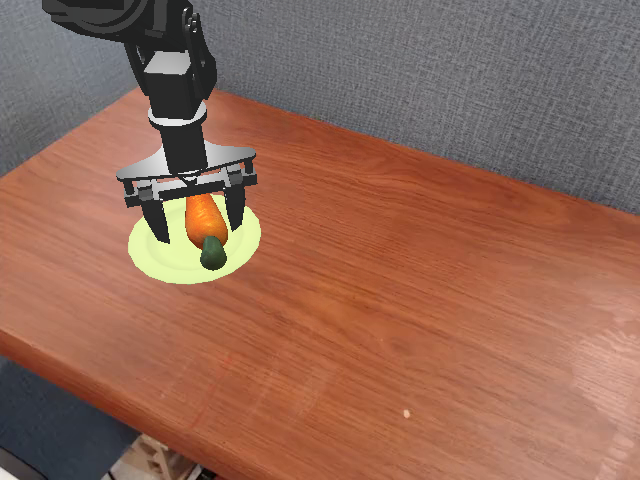

In [24]:
images_for_shadowing = data["image"]
images_for_shadowing[-1]

In [4]:
images_last_action = [Data[i]["arr_0"].item()["image"][-1] for i in range(len(Data))]

len(images_last_action)


75

In [29]:
images_last_action

[<PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=64

In [5]:
images_first_action = [Data[i]["arr_0"].item()["image"][0] for i in range(len(Data))] #Для проверки recall - у нас есть 58 правильных ответов, что морковь на тарелке, теперь узнаем, что он скажет, когда морковь не на тарелке

len(images_first_action)


75

In [ ]:
questions_list = [
    "What object are in the scene?",
    "Where is the carrot relative to the plate?",
    "Is the carrot on the plate?",
    "Is the gripper holding an object?",
    "Is there an object that can be eaten?",
]

messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe this image? Do you see the robot arm gripper and where? Give relative coords"}
        ]
    },
]

answers = pd.DataFrame(columns=questions_list)

for i, image in enumerate(data["image"]):
    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)

    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(
        generated_ids,
        skip_special_tokens=True,
    )
    answers.append(generated_texts[0].split("Assistant: ")[-1])


In [ ]:
import numpy as np

Data = [np.load(f"./RL4VLA/ManiSkill/mp_collect/PutOnPlateInScene25Single-v1/75/data/success_proc_0_numid_{i}_epsid_{i}.npz", allow_pickle=True) for i in range(0, 75)] 

data = Data[0]["arr_0"].item()

# import pandas as pd

# info_df = pd.DataFrame( [ data["info"][i].values() for i in range(len(data["info"])) ] )
# info_df.columns = data["info"][0].keys()
# info_df["action"] = [item for item in data["action"]]
# print(data["action"][12])

# info_df


({'elapsed_steps': array([30], dtype=int32), 'is_src_obj_grasped': array([False]), 'consecutive_grasp': array([False]), 'src_on_target': array([False]), 'gripper_carrot_dist': array([0.16375038], dtype=float32), 'gripper_plate_dist': array([0.1963564], dtype=float32), 'carrot_plate_dist': array([0.08682613], dtype=float32), 'success': array([False])}, <PIL.Image.Image image mode=RGB size=640x480 at 0x700278E864D0>)
30


30


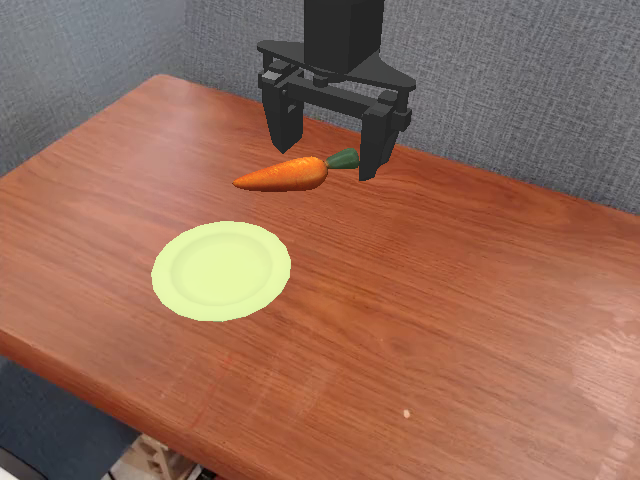

In [131]:
file = (Data[1]["arr_0"].item()["info"][0], Data[1]["arr_0"].item()["image"][0])

print(len(Data[0]["arr_0"].item()["info"]))

file[1]

In [134]:
import numpy as np
import os

def load_data_from_npz(path = None):
    '''Parce all episode data files, extract first, mid and end data'''
    if path is None:
        raise ValueError("You're not send path")
    
    npz_files = [f for f in os.listdir(path) if f.find('.npz') != -1]

    files = []
    
    for file in npz_files:
        file_path = path + "/" + file
        
        with np.load(file_path, allow_pickle=True) as data:
            mid_index = int(len(data["arr_0"].item()["info"])/2)

            file_summary = {
                "filename": file,
                "first_iter": (data["arr_0"].item()["info"][0], data["arr_0"].item()["image"][0]),
                "mid_iter": (data["arr_0"].item()["info"][mid_index], data["arr_0"].item()["image"][mid_index]),
                "last_iter": (data["arr_0"].item()["info"][-1], data["arr_0"].item()["image"][-1]),
            }

            files.append(file_summary)

    return files

In [135]:
spoon_on_table_clothin = load_data_from_npz("./RL4VLA/ManiSkill/mp_collect/PutSpoonOnTableClothInScene-v1/75/data")
carrot_on_plate_files = load_data_from_npz("./RL4VLA/ManiSkill/mp_collect/PutOnPlateInScene25Single-v1/75/data")

In [ ]:
carrot_on_plate_files[0]["filename"]

'success_proc_0_numid_70_epsid_70.npz'

In [ ]:
from tqdm import tqdm

questions_list = [
    "What objects are in the scene?",
    "Where is objects relative to each other?", #"Where is the carrot relative to the plate?",
    "Is the carrot on the plate?",
    "Is the gripper holding an object?",
    "Is there an object that can be eaten?",
]


answers = pd.DataFrame(columns=questions_list)


def collect_answers(data):
    collecting_data_loop = tqdm(range(), leave=True)
    images_set_len = len(data["image"]) #Собрать датасет из изображений с индексами [0], [mid], [-1] для каждой из 75 испытаний
    iters = list(filter(lambda s: s.find("iter") != -1, data[0].keys()))

    for i in collecting_data_loop:
        # Prepare inputs
        answer = {}

        for question in questions_list:
            
            message = [
                {
                    "role": "user",
                    "content": [
                        {"type": "image"},
                        {"type": "text", "text": question}
                    ]
                },
            ]


            prompt = processor.apply_chat_template(message, add_generation_prompt=True)
            for Iter in iters:
                inputs = processor(text=prompt, images=[data[i][Iter][1]], return_tensors="pt")
                inputs = inputs.to(DEVICE)

                # Generate outputs
                generated_ids = model.generate(**inputs, max_new_tokens=500)
                generated_text = processor.batch_decode(
                    generated_ids,
                    skip_special_tokens=True,
                )
                
                answer[f"{data[i]["filename"]}"].append(generated_text[0].split("Assistant: ")[-1])
        collecting_data_loop.set_description(f"{i+1}/{images_set_len} iteration, answers is {answers.iloc[i]}")

In [152]:
iters = carrot_on_plate_files[0].keys()
iters
keys = filter(lambda s: s.find("iter")!=-1, carrot_on_plate_files[0].keys())
list(keys)

['first_iter', 'mid_iter', 'last_iter']

In [ ]:


from tqdm import tqdm

questions_list = [
    "What objects are in the scene?",
    "Where is objects relative to each other?", #"Where is the carrot relative to the plate?",
    "Is the carrot on the plate?",
    "Is the gripper holding an object?",
    "Is there an object that can be eaten?",
]


answers = pd.DataFrame(columns=questions_list)

collecting_data_loop = tqdm(enumerate(data["image"]), leave=True)
images_set_len = len(data["image"]) #Собрать датасет из изображений с индексами [0], [mid], [-1] для каждой из 75 испытаний

for i, image in collecting_data_loop:
    # Prepare inputs
    for question in questions_list:
        
        message = [
            {
                "role": "user",
                "content": [
                    {"type": "image"},
                    {"type": "text", "text": question}
                ]
            },
        ]

        prompt = processor.apply_chat_template(message, add_generation_prompt=True)
        inputs = processor(text=prompt, images=[image], return_tensors="pt")
        inputs = inputs.to(DEVICE)

        # Generate outputs
        generated_ids = model.generate(**inputs, max_new_tokens=500)
        generated_text = processor.batch_decode(
            generated_ids,
            skip_special_tokens=True,
        )
        answers.loc[i, question] = generated_text[0].split("Assistant: ")[-1]
    collecting_data_loop.set_description(f"{i+1}/{images_set_len} iteration, answers is {answers.iloc[i]}")

1/30 iteration, answers is What objects are in the scene?              There is a plate, a carrot, a wooden table, an...
Where is objects relative to each other?                          They are in the foreground.
Is the carrot on the plate?                                  Yes, the carrot is on the plate.
Is the gripper holding an object?                   No, the gripper is not holding an object.
Is there an object that can be eaten?                    Yes, there is a carrot in the image.
1/30 iteration, answers is What objects are in the scene?              There is a plate, a carrot, a wooden table, an...
Where is objects relative to each other?                          They are in the foreground.
Is the carrot on the plate?                                  Yes, the carrot is on the plate.
Is the gripper holding an object?                   No, the gripper is not holding an object.
Is there an object that can be eaten?                    Yes, there is a carrot in the image.
2/30 i

In [76]:
answers.head(-1)

,What objects are in the scene?,Where is objects relative to each other?,Is the carrot on the plate?,Is the gripper holding an object?,Is there an object that can be eaten?
0,"There is a plate, a carrot, a wooden table, an...",They are in the foreground.,"Yes, the carrot is on the plate.","No, the gripper is not holding an object.","Yes, there is a carrot in the image."
1,"There is a plate, a carrot, a wooden table, an...",They are on a table.,"Yes, the carrot is on the plate.","No, the gripper is not holding an object.","Yes, there is a carrot in the image."
2,"There is a plate, a carrot, and a stove in the...",Objects are in the foreground.,"Yes, the carrot is on the plate.","No, the gripper is not holding an object.","Yes, there is a carrot in the image."
3,"There is a plate, a carrot, and a wooden table...",Objects are in the foreground.,"Yes, the carrot is on the plate.","No, the gripper is not holding an object.","Yes, there is a carrot in the image."
4,"There is a plate, a carrot, a bowl, and a glas...",Objects are in front of a table.,"Yes, the carrot is on the plate.","Yes, the gripper is holding a carrot.","Yes, there is a carrot in the image."
5,"There is a plate, a carrot, and a wooden table...",Objects are in the center of the image.,"Yes, the carrot is on the plate.","Yes, the gripper is holding an object.","Yes, there is a carrot in the image."
6,There is a carrot and a plate in the image.,Objects are in the center of the image.,"Yes, the carrot is on the plate.","Yes, the gripper is holding a carrot.","Yes, there is a carrot in the image."
7,"There is a plate, a carrot, and a tool in the ...",Objects are in front of a table.,"Yes, the carrot is on the plate.","Yes, the gripper is holding a carrot.","Yes, there is a carrot in the image."
8,"There is a plate, a carrot, and a wooden table...",Objects are in front of a table.,"Yes, the carrot is on the plate.","Yes, the gripper is holding a carrot.","Yes, there is a carrot in the image."
9,"There is a plate, a carrot, a fork, and a fork...",Objects are in front of a table.,"Yes, the carrot is on the plate.","Yes, the gripper is holding a carrot.","Yes, there is a carrot in the image."


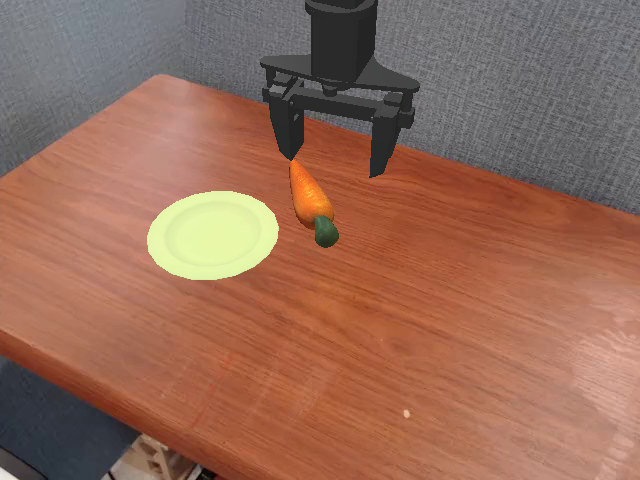

In [79]:
# answers.iloc[4, 0]
data["image"][4]

In [22]:
questions_list = [
    "What object are in the scene?",
    "Where is objects relative to each other?", #"Where is the carrot relative to the plate?",
    "Is the carrot on the plate?",
    "Is the gripper holding an object?",
    "Is there an object that can be eaten?",
]

for question in questions_list:
        
        message = [
            {
                "role": "user",
                "content": [
                    {"type": "image"},
                    {"type": "text", "text" : question}
                ]
            },
        ]

        prompt = processor.apply_chat_template(message, add_generation_prompt=True)
        print(prompt)

<|im_start|>User:<image>What object are in the scene?<end_of_utterance>
Assistant:
<|im_start|>User:<image>Where is objects relative to each other?<end_of_utterance>
Assistant:
<|im_start|>User:<image>Is the carrot on the plate?<end_of_utterance>
Assistant:
<|im_start|>User:<image>Is the gripper holding an object?<end_of_utterance>
Assistant:
<|im_start|>User:<image>Is there an object that can be eaten?<end_of_utterance>
Assistant:


In [9]:
for item in answers:
    print(item)

User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: No, there is no robot or robot arm gripper present in the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, there is a robot arm gripper in the top right corner of the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assistant: Yes, there is a robot arm gripper in the top right corner of the image.
User:



Can you describe this image? Do you see the robot arm gripper and where? Give relative coords
Assi

In [10]:
len(answers)

33

In [11]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Is the orange object (carrot) on the yellow plate in this image? Yes/No."}
        ]
    },
]

benchmark_answ = []

for image in images_last_action:
    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)

    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(
        generated_ids,
        skip_special_tokens=True,
    )
    benchmark_answ.append(generated_texts[0])

In [13]:
# for answ in benchmark_answ:
#     print(answ)

sum("Assistant: Yes" in s for s in benchmark_answ)/len(benchmark_answ)

0.7733333333333333

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            # {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Is the orange object (carrot) on the yellow plate in this image? Yes/No."}
        ]
    },
]

benchmark_answ1 = []

for image in images_first_action:
    # Prepare inputs
    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt")
    inputs = inputs.to(DEVICE)

    # Generate outputs
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(
        generated_ids,
        skip_special_tokens=True,
    )
    benchmark_answ1.append(generated_texts[0])

TypeError: len() takes exactly one argument (0 given)

In [14]:
sum("Assistant: No" in s for s in benchmark_answ1)/len(benchmark_answ1)

0.56

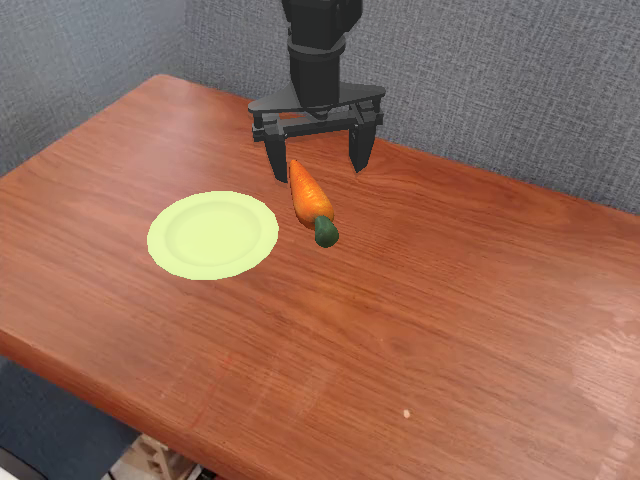

In [47]:
from PIL import Image

# Load images and convert to RGBA
img1 = images_for_shadowing[10].convert("RGBA")
img2 = images_for_shadowing[9].convert("RGBA")
img3 = images_for_shadowing[8].convert("RGBA")

# Blend gradually
blend1 = Image.blend(img1, img2, alpha=0.7)  # second image faint
final = Image.blend(blend1, img3, alpha=0.5) # third image even fainter

final


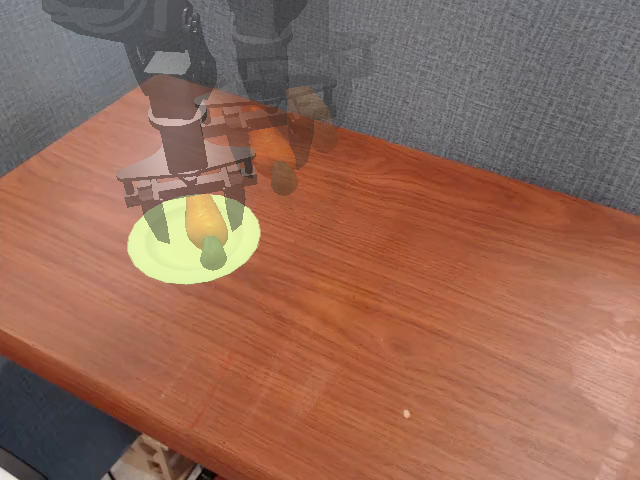

In [86]:
from PIL import Image
import numpy as np

def create_trail(frames, alphas=None):
    """
    Create a motion trail effect by blending multiple PIL RGB frames.
    
    frames: list of PIL.Image.Image objects (all same size, RGB).
    alphas: list of weights (same length as frames) — if None, use fading weights.
    
    Returns: PIL.Image.Image with trail effect.
    """
    n = len(frames)
    if alphas is None:
        # Decreasing weights (strongest for most recent frame)
        alphas = np.linspace(0.8, 0.1, n)  
    alphas = np.array(alphas) / np.sum(alphas)  # normalize
    
    # Convert frames to numpy arrays
    arrays = [np.asarray(f).astype(np.float32) for f in frames]
    
    # Weighted sum
    result = np.zeros_like(arrays[0])
    for arr, w in zip(arrays, alphas):
        result += arr * w
    
    result = np.clip(result, 0, 255).astype(np.uint8)
    return Image.fromarray(result)

ifs = images_for_shadowing[::-4]
trail_img = create_trail(ifs[0:4])
trail_img


In [ ]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe the carrot path?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[images_for_shadowing[0], images_for_shadowing[-1]], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])

User:







Can you describe the carrot path?
Assistant: The carrot is on the carrot path.


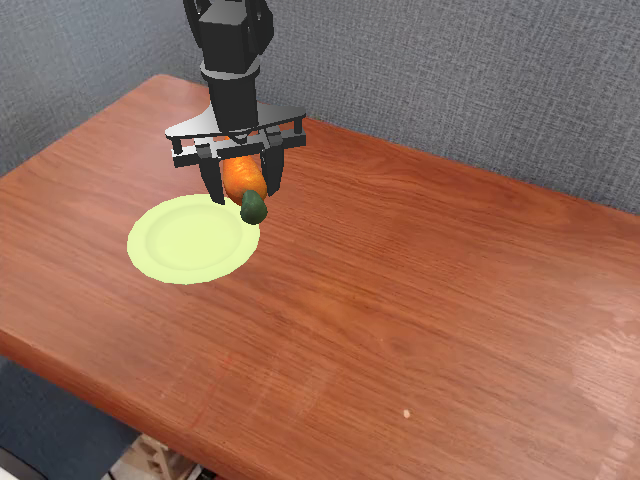

In [95]:
images_for_shadowing[-4]

In [ ]:
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "image"},
            {"type": "text", "text": "Can you describe the carrot path?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[images_for_shadowing[0], images_for_shadowing[-1]], return_tensors="pt")
inputs = inputs.to(DEVICE)

# Generate outputs
generated_ids = model.generate(**inputs, max_new_tokens=500)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

print(generated_texts[0])